In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
df = pd.read_csv('v_finland_plots_targets.csv')

In [3]:
df

,plot_id,lon,lat,num_pine,vol_pine,num_spruce,vol_spruce,num_deciduous,vol_deciduous,number,volume,diameter,height,age,ratio_pine,ratio_spruce,ratio_deciduous,dominant_species
0,509711,23.760515,61.857391,629,239.3,79,27.6,118,11.3,825,278.2,22.5,19.6,40,0.86017,0.09921,0.04062,pine
1,509712,23.776417,61.857257,668,129.7,118,16.5,393,28.6,1179,174.9,17.8,15.7,35,0.74157,0.09434,0.16352,pine
2,509713,23.762006,61.854816,865,194.8,0,0.0,39,0.2,904,195.0,20.0,15.7,35,0.99897,0.00000,0.00103,pine
3,509714,23.761818,61.852331,2358,130.1,236,4.4,472,6.4,3065,140.9,12.4,12.0,30,0.92335,0.03123,0.04542,pine
4,509715,23.762492,61.850755,200,105.7,320,127.4,20,0.4,540,233.6,26.6,20.5,62,0.45248,0.54538,0.00171,none
5,509728,23.741374,61.846075,196,106.4,1061,231.3,0,0.0,1258,337.7,22.0,20.5,56,0.31507,0.68493,0.00000,spruce
6,509729,23.748967,61.846105,79,24.8,865,235.3,118,42.4,1061,302.5,24.2,21.1,76,0.08198,0.77785,0.14017,spruce
7,509730,23.753147,61.847044,1701,24.4,600,7.8,0,0.0,2302,32.2,7.8,5.9,13,0.75776,0.24224,0.00000,pine
8,509731,23.756830,61.846984,40,20.5,440,209.1,0,0.0,480,229.6,24.9,22.0,55,0.08929,0.91071,0.00000,spruce
9,509732,23.742385,61.843113,1258,49.3,196,4.8,786,5.6,2240,59.7,11.2,8.3,18,0.82580,0.08040,0.09380,pine


In [5]:
ds = xr.open_dataset("era5-nordics-rh_daily.nc")

In [6]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-01T23:00:00 ... 2017-12-31T23:00:00
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 ... 31.25 31.5 31.75 32.0
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 ... 54.0 53.75 53.5
Data variables:
    rh         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Sun Oct 21 07:51:30 2018: cdo -b 32 ydaymean -expr,rh=100*(...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [12]:
lon = ds.longitude.values
lat = ds.latitude.values

In [13]:
delta_lon = lon[1] - lon[0]
delta_lat = lat[1] - lat[0]

In [14]:
llat = lat.min()
ulat = lat.max()
llon = lon.min()
ulon = lon.max()
(llon, llat, ulon, ulat)

(4.5, 53.5, 32.0, 71.5)

In [15]:
grid = np.zeros((lon.shape[0], lat.shape[0]))

In [17]:
df["i"] = df["lon"].apply(lambda x: int(round((x - llon) / delta_lon)))
df["j"] = df["lat"].apply(lambda y: int(round((y - llat) / delta_lat)))

In [28]:
df.dropna(inplace=True)

In [69]:
rows = lat.shape[0]
columns = lon.shape[0]
size = (rows, columns)

volpine = np.zeros(size)
volpine_count = np.zeros(size)

volspruce = np.zeros(size)
volspruce_count = np.zeros(size)

voldeciduous = np.zeros(size)
voldeciduous_count = np.zeros(size)

for idx, row in df.iterrows():
    i = row.i
    j = row.j
    volpine[j][i] += float(row.ratio_pine)
    volpine_count[j][i] += 1
    
    volspruce[j][i] += float(row.ratio_spruce)
    volspruce_count[j][i] += 1
    
    voldeciduous[j][i] += float(row.ratio_deciduous)
    voldeciduous_count[j][i] += 1
    
volpine = np.divide(volpine, volpine_count, out=np.zeros_like(volpine), where=volpine_count!=0)
volspruce = np.divide(volspruce, volspruce_count, out=np.zeros_like(volspruce), where=volspruce_count!=0)
voldeciduous = np.divide(voldeciduous, voldeciduous_count, out=np.zeros_like(voldeciduous), where=voldeciduous_count!=0)

In [70]:
dlon = xr.DataArray(lon, dims=['longitude'])
dlat = xr.DataArray(lat, dims=['latitude'])

In [71]:
ds_pine = xr.Dataset(
    data_vars = {'pine_ratio': (('latitude', 'longitude'), volpine)},
    coords = {'latitude': lat,
             'longitude': lon}
)

In [72]:
ds_pine

<xarray.Dataset>
Dimensions:     (latitude: 73, longitude: 111)
Coordinates:
  * latitude    (latitude) float32 71.5 71.25 71.0 70.75 ... 54.0 53.75 53.5
  * longitude   (longitude) float32 4.5 4.75 5.0 5.25 ... 31.25 31.5 31.75 32.0
Data variables:
    pine_ratio  (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

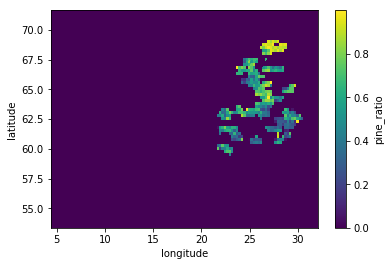

In [73]:
ds_pine.pine_ratio.plot()

In [74]:
ds_pine.to_netcdf('pine_ratio_finland.nc')

In [75]:
ds_spruce = xr.Dataset(
    data_vars = {'spruce_ratio': (('latitude', 'longitude'), volspruce)},
    coords = {'latitude': lat,
             'longitude': lon}
)

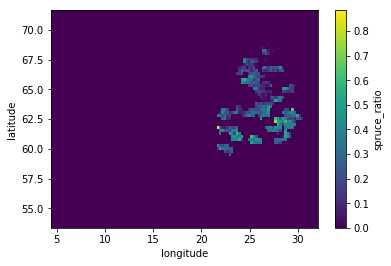

In [77]:
ds_spruce.spruce_ratio.plot()

In [78]:
ds_spruce.to_netcdf('spruce_ratio_finland.nc')

In [79]:
ds_deciduous = xr.Dataset(
    data_vars = {'deciduous_ratio': (('latitude', 'longitude'), voldeciduous)},
    coords = {'latitude': lat,
             'longitude': lon}
)

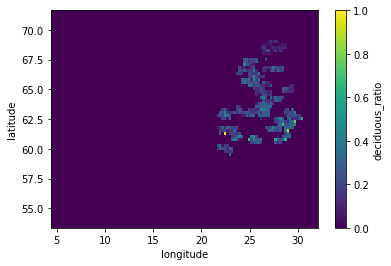

In [80]:
ds_deciduous.deciduous_ratio.plot()

In [81]:
ds_deciduous.to_netcdf('deciduous_ratio_finland.nc')